# Stock Price Predictor - EDA

# Introduction

An ideal real-world application of machine learning is in the world of trading and investing. It all works on predicting what will have to the price of a stock in the next few minutes or a few years. Hence, the aim is to **predict** and there is a **large amount of historical data** available to assist in making a prediction. Laying out the foundation to apply some machine learning algorithms.

I decided to take on this problem due to my interest in finance and some internship experience at a start-up that focuses on machine learning applications in intraday trading. I believe working on this project will give me a better understanding of the financial markets (finance in general) and time-series machine learning problems. As I have new to the world of machine learning and finance, I have decided to carry out technical analysis using the historical data of stocks.

## Problem Statement

**The aim of this project is to predict the long-term price trend of two indices and one stock with at least 90% accuracy.<sup>1</sup>** The stocks and indices will be chosen based on countries of interest and personal preference, but are clearly defined in the [Datasets and Inputs section](#Datasets-and-Inputs). In the end, the ability of the model will be tested by making predicting one full year worth of data. Furthermore, the model&#39;s ability to predict how the stocks performed in 2020 (the year of the pandemic) will be observed.

<sup>*1*</sup> *90% accuracy can be taken as 10% mean absolute percentage error.*

## Evaluation Metrics

I will be using two evaluation metrics to understand the model&#39;s performance.

1. **Mean Absolute Percentage Error (MAPE)**: It is the mean of percentage of absolute errors of the predictions. The following formula explains how it is calculated (&#39;MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)&#39;, 2006; Glen, 2011) :

2. **Percentage Points Correctly Predicted** : It is the percentage of actual points that lie in the 30-70 (shorter inter-quartile) range of the predictions.

![Example Graph](images/metric-example-graph.png)

In the example graph above, it is clear that there are 3 out of 5 points fall in the 30-70 quartile range. Hence,

I came up with this metric as a solution to the problem predicting for larger intervals. I intend to use this to be understand of the model can make accurate predictions on the long-term trends. However, some weakness of the metric would be its inability to give great results for predictions with high variability (standard deviation). As a high standard deviation would be a larger area is covered by the predictions, the probability of the actual value to land within the 30-70 range is higher. However, if the standard deviation is high, the model is not following any specific trend (up or down) but is just spreading in both directions, leading to an inaccurate measure of what is actually happening.

Hence, a combination of MAPE and Percentage Points will give a better understanding of how the model is performing.

> In this notebook we are going to explore the dataset that was downloaded from Yahoo Finance.

In [5]:
import pandas as pd
import os

In [8]:
# Load stocks data
stock_names = ['^GSPC', '^BSESN', 'AAPL']

data_dir = 'data'
data = {}

for stock in stock_names:
    data[stock] = pd.read_csv(os.path.join(data_dir, stock + '.csv'),
                              parse_dates=True, index_col=['Date'])

In [9]:
data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [4]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 55 kB 5.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


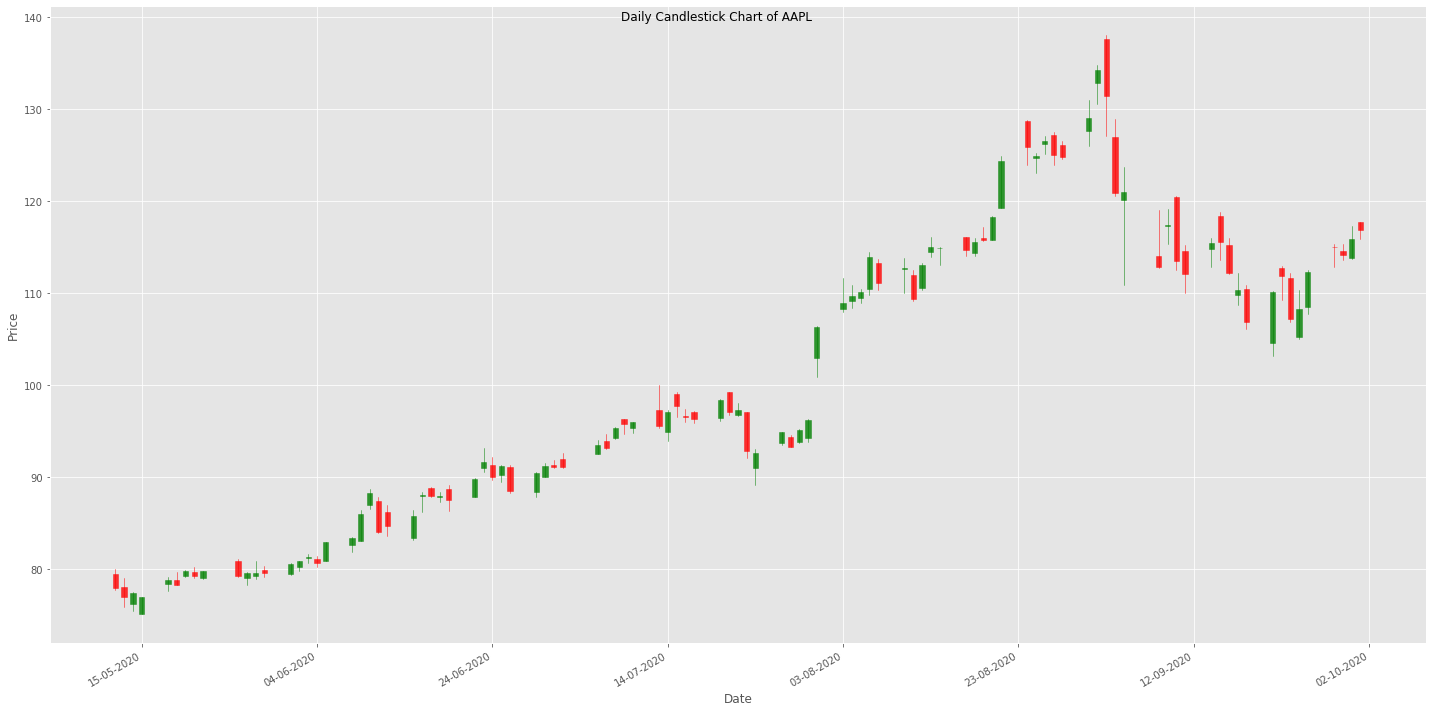

In [11]:
# python_candlestick_chart.py

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
data = pd.read_csv('data/AAPL.csv').tail(100)
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(20,10))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of AAPL')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()